Created By: Tanisha Shrotriya

In [1]:
# # !nvidia-smi
%pip install numpy
%pip install matplotlib
%pip install glob
%pip install os 
%pip install sklearn
%pip install -U scikit-learn scipy matplotlib scikit-image
%pip install opencv-python
%pip install kmeanstf
%pip install keract
%pip install -U scikit-learn scipy matplotlib
%pip install opencv-python
%pip install kmeanstf
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as matplotlib_image
import glob
import os
import cv2
from tensorflow.keras.layers import Flatten, Dense, Input, Lambda, Conv2D, MaxPooling2D
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
import tensorflow as tf
from glob import glob
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
import re
from keras.models import Model
from numpy.linalg import norm

2022-12-19 20:25:51.502833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 20:25:51.661692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /panfs/jay/groups/6/csci8523/shrot007/.local/lib/python3.7/site-packages/cv2/../../lib64:/panfs/roc/msisoft/cuda/10.0/lib64
2022-12-19 20:25:51.661759: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 20:25:52.671317: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:6


## Data Pre-processing 
### 1. Extract data into numpy arrays called - frac_map 
- Each fraction map is of shape (1,64,64) 
- There are 26754 data in total in fraction map
### Read images created from Task 1

Con | River | Non-river

90% | 1,940 | 23,061


## Helper Functions

In [7]:
def visualize(data, data_size, cols, title, fx, fy, folder = 'default',file='default', save = 'False', dtype='graph'):
    os.makedirs(folder, exist_ok=True)
    if data_size > 0:
        rows = (data_size//cols) + 1
        fig, axes = plt.subplots(rows,cols, figsize=(fx,fy))
        fig.suptitle(title,y=1.0,fontsize=40,ha='center')
        ax = axes.ravel()
        for i in range(0,data_size):
            if dtype == 'image':
                ax[i].imshow(data[i])
            else:
                ax[i].plot(data[i])
        
        if dtype == 'image':
            for a in ax:
                     a.set_axis_off()

        if save == 'True' : 
            path = folder+file
            plt.savefig(path)
            
        plt.subplots_adjust(wspace=0.2, hspace=0.2)
        plt.tight_layout()
        plt.show()   

In [8]:
def save_files(data,folder,image):
    os.makedirs(folder, exist_ok=True)
    for i in range(0, len(data)):
        img_name = folder + str(i) + ".jpeg"
        image.imsave(img_name, data[i])

In [16]:
# Data Pre-processing 

import random
from tensorflow.keras.preprocessing import image

def readData(fracmaps_dir):
    frac_maps = os.listdir(fracmaps_dir)
    print(frac_maps)
    images = random.sample(frac_maps,10)
    total_maps = len(images)
    print("total_maps len is ", total_maps)

    # read fraction map and time series into img arrays
    rivers = []
    for i in range(0, total_maps):
        river = fracmaps_dir+frac_maps[i]
        rivers.append(np.array(Image.open(river)))

    X_train = np.array(rivers)
    print(X_train.shape)
    return X_train

In [17]:
def draw(clusters,folder,save_in):
    for i in (0,clusters):
#         fracmaps_dir =folder+str(i)+'/'
#         data = readData(fracmaps_dir)
        title = 'Rivers_Cluster_'+str(i)
        file = title
        save = True
        visualize(data[:,:,:,1], data.shape[0],4,title,*(20,20),save_in, file,save,'image')

In [62]:
folder =  '../data/UCL_Results_2/EXP1_KR_317_UCL_70_2/'
river  = folder+'cluster_'+str(i)
images = os.listdir(river)
images

['0.jpeg']

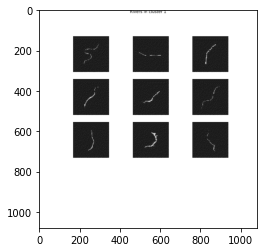

In [79]:
from tensorflow.keras.preprocessing import image
from PIL import Image

folder =  '../data/UCL_Results_2/EXP1_KR_317_UCL_70_2/'
save_in =  '../data/UCL_Results_2/EXP1_KR_317_UCL_70_2/'
clusters = 2
images = []
rivers = []
for i in (0,clusters-1):
    graph= folder+'cluster_'+str(i)
    river = folder+str(i)+'_Cluster_Rivers.jpeg'
    res = folder+str(i)+'res.jpeg'
    img = Image.open(river)
    grey = img.convert('L')
    bw = grey.convert('1')
    bw.save(res,quality=95)
    plt.figsize = (100,100)
    plt.imshow(bw)
    #plt.savefig(res,dpi=200)

# Experiments - Confidence 90

In [ ]:
experiment = 'EXP2_C90_1940_UCL_70_3'
ucl_model = select_model()['ucl_model']
threshold = 0.7
clusters = 3
epochs = 50

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,827,201
Trainable params: 262,401
Non-trainable params: 23,564,800
_________________________________________________________________
None
Layer type:  

Loss used: categorical_crossentropy, Optimizer used: adam
Epoch 1/50
97/97 [==============================] - 44s 335ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 2/50
97/97 [==============================] - 27s 278ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 3/50
97/97 [==============================] - 31s 320ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 4/50
97/97 [==============================] - 25s 261ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 5/50
97/97 [==============================] - 24s 242ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 6/50
97/97 [==============================] - 15s 160ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 7/50
97/97 [==============================] - 27s 278ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 8/50
97/97 [==============================] - 30s 309ms/step - loss: 0.0000e+00 - accuracy: 0.5773
Epoch 9/50
97/97 [==============================] - 24s 249ms/step - loss: 0.0000e+00 - accuracy: 0.57

Epoch 29/50
97/97 [==============================] - 30s 312ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 30/50
97/97 [==============================] - 34s 349ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 31/50
97/97 [==============================] - 16s 162ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 32/50
97/97 [==============================] - 37s 384ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 33/50
97/97 [==============================] - 28s 284ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 34/50
97/97 [==============================] - 27s 275ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 35/50
97/97 [==============================] - 32s 334ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 36/50
97/97 [==============================] - 29s 301ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 37/50
97/97 [==============================] - 36s 370ms/step - loss: 0.0000e+00 - accuracy: 0.2912
Epoch 38/50
97/97 [===========================

97/97 [==============================] - 29s 301ms/step - loss: 0.0000e+00 - accuracy: 0.2918
Epoch 45/50
97/97 [==============================] - 32s 324ms/step - loss: 0.0000e+00 - accuracy: 0.2918
Epoch 46/50
97/97 [==============================] - 35s 358ms/step - loss: 0.0000e+00 - accuracy: 0.2918
Epoch 47/50
97/97 [==============================] - 24s 243ms/step - loss: 0.0000e+00 - accuracy: 0.2918
Epoch 48/50
97/97 [==============================] - 25s 252ms/step - loss: 0.0000e+00 - accuracy: 0.2918
Epoch 49/50
97/97 [==============================] - 34s 345ms/step - loss: 0.0000e+00 - accuracy: 0.2918
Epoch 50/50
97/97 [==============================] - 21s 218ms/step - loss: 0.0000e+00 - accuracy: 0.2918
Iteration is:  5
Layer type:  <keras.layers.reshaping.flatten.Flatten object at 0x7efc509fc110>
Layer details:  KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
61/

In [ ]:
experiment = 'EXP3_C90_1940_UCL_70_4'
ucl_model = select_model()['ucl_model']
threshold = 0.7
clusters = 4
epochs = 70

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP4_C90_1940_UCL_70_5'
ucl_model = select_model()['ucl_model']
threshold = 0.7
clusters = 5
epochs = 90

# experiment details : retrain the model for 1 iteration. 
rtl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP5_C90_1940_UCL_80_2'
ucl_model = select_model()['ucl_model']
threshold = 0.8
clusters = 2
epochs = 5

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP6_C90_1940_UCL_80_3'
ucl_model = select_model()['ucl_model']
threshold = 0.8
clusters = 3
epochs = 50

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP7_C90_1940_UCL_80_4'
ucl_model = select_model()['ucl_model']
threshold = 0.8
clusters = 4
epochs = 70

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP8_C90_1940_UCL_80_5'
ucl_model = select_model()['ucl_model']
threshold = 0.8
clusters = 5
epochs = 90

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP9_C90_1940_UCL_90_2'
ucl_model = select_model()['ucl_model']
threshold = 0.9
clusters = 2
epochs = 5

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP10_C90_1940_UCL_90_3'
ucl_model = select_model()['ucl_model']
threshold = 0.9
clusters = 3
epochs = 50

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP11_C90_1940_UCL_90_4'
ucl_model = select_model()['ucl_model']
threshold = 0.9
clusters = 4
epochs = 70

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)

In [ ]:
experiment = 'EXP12_C90_1940_UCL_90_5'
ucl_model = select_model()['ucl_model']
threshold = 0.9
clusters = 5
epochs = 90

# experiment details : retrain the model for 1 iteration. 
ucl_experiments(ucl_model, plt, clusters, threshold, epochs)